In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datajoint as dj
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style('ticks', rc={'image.cmap': 'bwr'})

import os
import sys
import inspect

p = !pwd
p = os.path.dirname(os.path.dirname(p[0]))
if p not in sys.path:
    sys.path.append(p)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from cnn_sys_ident.mesonet.data import MultiDataset
from cnn_sys_ident.mesonet.parameters import Core, Readout, Model, RegPath, Fit
from cnn_sys_ident.mesonet import MODELS
from cnn_sys_ident.mesonet.controls import FitTrialSubset

Connecting aecker@52.202.15.166:3306


In [3]:
data_key = dict(data_hash='cfcd208495d565ef66e7dff9f98764da')
data = (MultiDataset() & data_key).load_data()

In [4]:
_, responses_test_raw = data.test(averages=False)
reps, num_imgs, num_neurons = responses_test_raw.shape

In [7]:
obs_var = (responses_test_raw.var(axis=0, ddof=1) / reps).mean(axis=0)
total_var = responses_test_raw.mean(axis=0).var(axis=0, ddof=1)
explainable_var = total_var - obs_var
frac_explainable_var = explainable_var / total_var
frac_explainable_var[frac_explainable_var < 0] = 0

obs_var_raw = (responses_test_raw.var(axis=0, ddof=1)).mean(axis=0)
total_var_raw = responses_test_raw.reshape([-1, num_neurons]).var(axis=0, ddof=1)

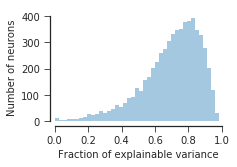

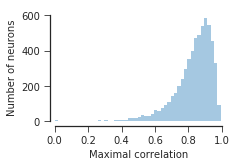

In [22]:
plt.figure(figsize=(3, 2))
sns.distplot(frac_explainable_var, kde=False)
plt.xlabel('Fraction of explainable variance')
plt.ylabel('Number of neurons')
plt.xlim([0, 1])
sns.despine(trim=True, offset=5)

plt.figure(figsize=(3, 2))
sns.distplot(np.sqrt(frac_explainable_var), kde=False)
plt.xlabel('Maximal correlation')
plt.ylabel('Number of neurons')
plt.xlim([0, 1])
sns.despine(trim=True, offset=5)

In [21]:
print('Best possible average correlation: {:.2f}'.format(
    np.sqrt(frac_explainable_var).mean()))

Best possible average correlation: 0.83
